In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_log_error
import xgboost as xgb
from xgboost import XGBRegressor
import catboost as cb
from category_encoders.cat_boost import CatBoostEncoder
#from dython import nominal
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

### Converting TotalCharges column to numeric

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

### Check for duplicates

In [6]:
df.duplicated().sum()

0

### Check for missing values

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- **11 Null values in 'TotalCharges' column**

**Value Counts**

In [8]:
for c in df.drop(columns=['customerID']):
    print (c)
    print (df[c].value_counts())
    print ("------------------")

gender
Male      3555
Female    3488
Name: gender, dtype: int64
------------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: i

# EDA

**Categorical features count plot**

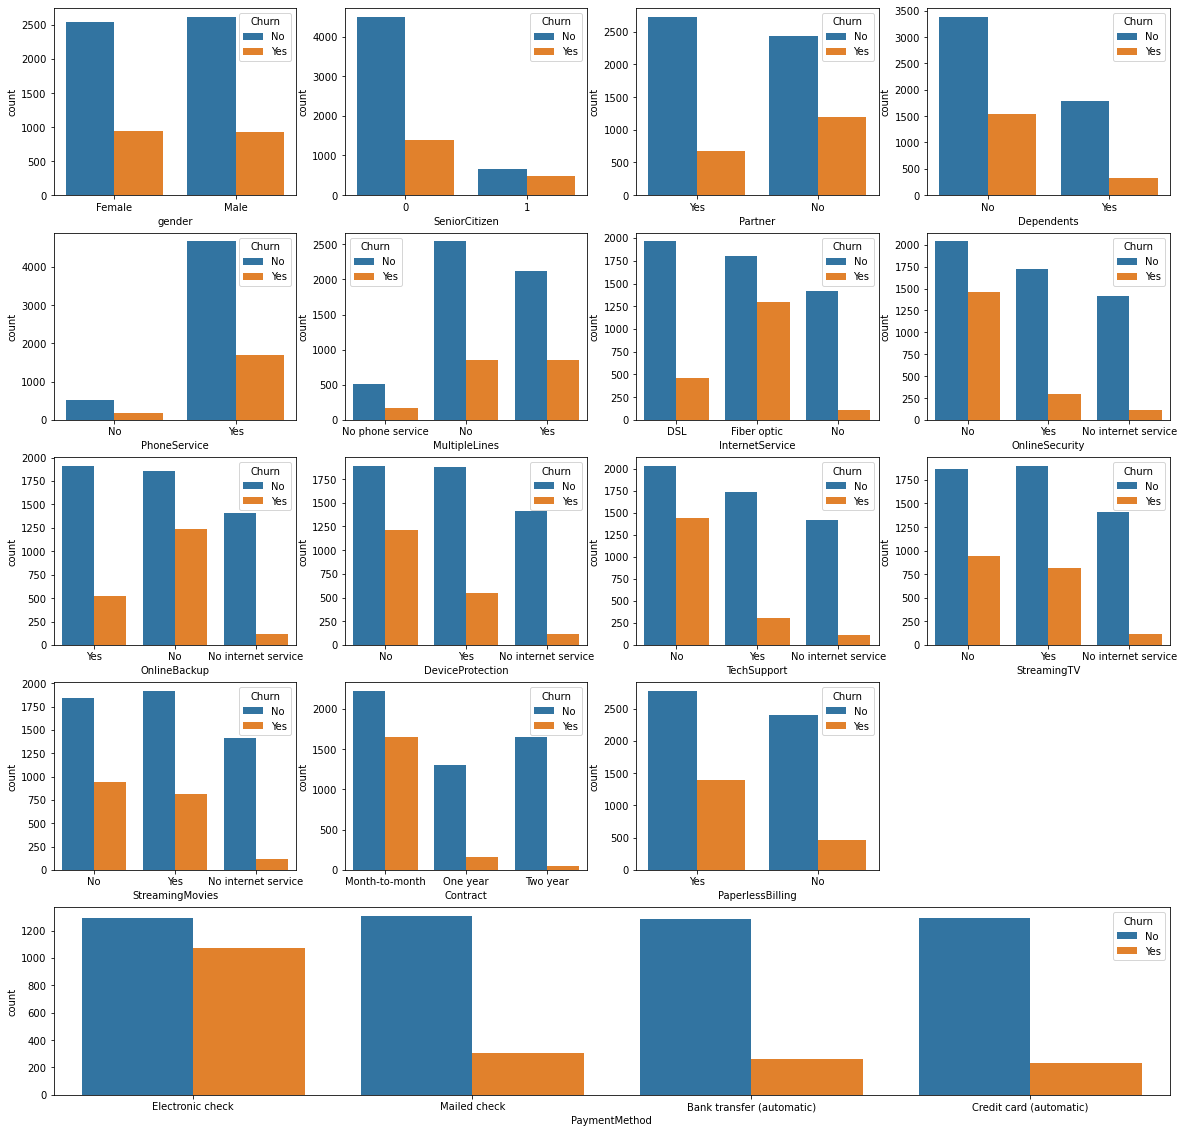

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(5, 4, 1)
_= sns.countplot(x= 'gender', hue='Churn', data=df)

plt.subplot(5, 4,2)
_ = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df)

plt.subplot(5, 4, 3)
_ = sns.countplot(x= 'Partner', hue='Churn', data=df)

plt.subplot(5, 4,4)
_ = sns.countplot(x= 'Dependents', hue='Churn', data=df)

plt.subplot(5, 4,5)
_ = sns.countplot(x= 'PhoneService', hue='Churn', data=df)

plt.subplot(5, 4,6)
_ = sns.countplot(x= 'MultipleLines', hue='Churn', data=df)

plt.subplot(5, 4,7)
_ = sns.countplot(x= 'InternetService', hue='Churn', data=df)

plt.subplot(5, 4,8)
_ = sns.countplot(x= 'OnlineSecurity', hue='Churn', data=df)

plt.subplot(5, 4,9)
_ = sns.countplot(x= 'OnlineBackup', hue='Churn', data=df)

plt.subplot(5, 4, 10)
_ = sns.countplot(x= 'DeviceProtection', hue='Churn', data=df)

plt.subplot(5, 4,11)
_ = sns.countplot(x= 'TechSupport', hue='Churn', data=df)

plt.subplot(5, 4,12)
_ = sns.countplot(x= 'StreamingTV', hue='Churn', data=df)

plt.subplot(5, 4,13)
_ = sns.countplot(x= 'StreamingMovies', hue='Churn', data=df)

plt.subplot(5, 4,14)
_ = sns.countplot(x= 'Contract', hue='Churn', data=df)

plt.subplot(5, 4,15)
_ = sns.countplot(x= 'PaperlessBilling', hue='Churn', data=df)

plt.subplot(5, 1, 5)
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df)

**Histogram & Boxplots of continous features**

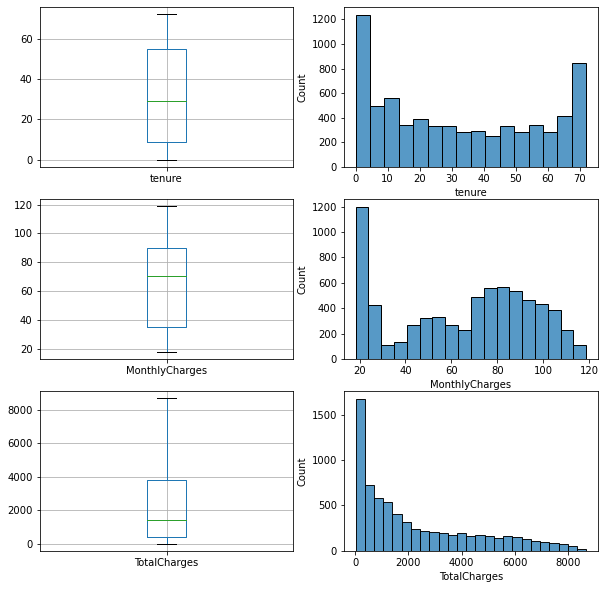

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
_ = df.boxplot(column=['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=df)

plt.subplot(3, 2, 3)
_ = df.boxplot(column=['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=df)

plt.subplot(3, 2, 5)
_ = df.boxplot(column=['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=df)

- **Boxplots show that there are No outliers in the continuous variables**

**The churn rate in the data**

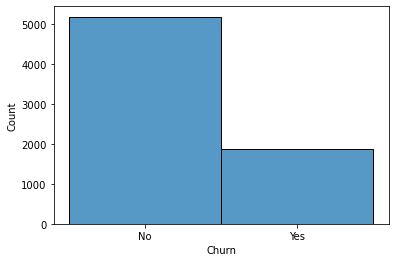

In [11]:
_ = sns.histplot(x= 'Churn', data=df)

### Correlation

<AxesSubplot:>

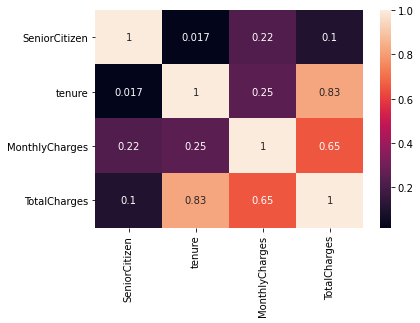

In [12]:
sns.heatmap(df.corr(), annot=True)
#nominal.associations(df.drop(columns= ['customerID']), figsize = (20,20), mark_columns = True)

**Display a scatter plot of Total Charges versus Monthly Charges**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

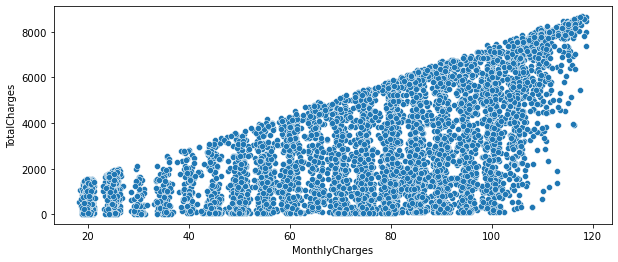

In [13]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges')

# Data Preparation

### Cleaning some categorical features

From the count plot, we can notice that there are some categorical features that have 'No' and 'No Internet Service' or 'No Phone Service' as a separate category which don't give new info and could be considered as 'No'

In [14]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

### Handling Null values in "TotalCharges" column

- Dropping

In [15]:
#df = df.dropna()

- Fill with Mean value

In [16]:
df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace=True)

### Feature Scaling

- Min-Max scalar

In [17]:
columns=['MonthlyCharges','TotalCharges']
x = df[columns].values 
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[columns] = pd.DataFrame(x_scaled)

In [18]:
# columns=['MonthlyCharges','TotalCharges']
# x = df[columns].values 
# std_scaler = StandardScaler()
# x_scaled = std_scaler.fit_transform(x)
# df[columns] = pd.DataFrame(x_scaled)

- Log transform

In [19]:
# df['MonthlyCharges']=np.log(df['MonthlyCharges'])
# df['TotalCharges']=np.log(df['TotalCharges'])

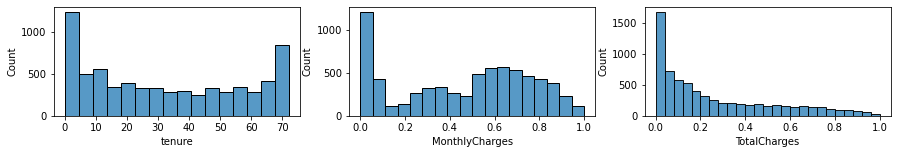

In [20]:
plt.figure(figsize=(15,2))
plt.subplot(1, 3, 1)
_ = sns.histplot(x='tenure', data=df)

plt.subplot(1, 3, 2)
_ = sns.histplot(x='MonthlyCharges', data=df)

plt.subplot(1, 3, 3)
_ = sns.histplot(x='TotalCharges', data=df)

### Handling binary categorical features & target

In [21]:
df['gender'] = np.where(df['gender'] == 'Female', 1, 0)

cat_columns = ['Partner', 'Dependents', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cat_columns] = np.where(df[cat_columns] == 'Yes', 1, 0)

# Target
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

### Encoding features with multiple categories

- One-hot encoding

In [22]:
# features = ['InternetService','Contract','PaymentMethod','tenure_range']
# df = pd.concat([df, pd.get_dummies(df[features])], axis='columns')
# df = df.drop(columns=features)

- Label encoding with similar weights

In [23]:
df.replace({'DSL':1,'No': 0, "Fiber optic":-1},inplace=True)
df.replace({'Month-to-month':-1, "One year":0, "Two year":1},inplace=True)
df.replace({'Electronic check':-2, "Mailed check":-1, "Bank transfer (automatic)":1, "Credit card (automatic)":2},inplace=True)

## Derive new features

- **We create a derived feature from tenure dividing it into four categories**

In [24]:
condition = [((df.tenure >= 0)&(df.tenure <= 12)), ((df.tenure > 12)&(df.tenure <= 24)), 
             ((df.tenure > 24)&(df.tenure <= 36)),((df.tenure > 36)&(df.tenure <= 48)),
             ((df.tenure > 48)&(df.tenure <= 60)), (df.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
df['tenure_range'] = np.select(condition, choice)

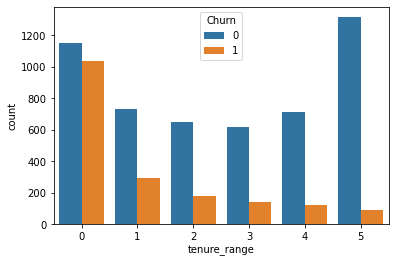

In [25]:
_ = sns.countplot(x= 'tenure_range', hue='Churn', data=df)

- **Multiplying 'tenure_range' column and 'Contract' column indicating loyal customers**

In [26]:
df['Loyal_customer'] = df['tenure_range'] * df["Contract"]*20

**Final look at data**

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range,Loyal_customer
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,-1,1,-2,0.115423,0.001275,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,0,0,0,-1,0.385075,0.215867,0,2,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,-1,1,-1,0.354229,0.010310,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,0,0,0,0,1,0.239303,0.210241,0,3,0
4,9237-HQITU,1,0,0,0,2,1,0,-1,0,...,0,0,-1,1,-2,0.521891,0.015330,1,0,0


## Splitting the dataset

In [28]:
X = df.drop(["customerID", "Churn"], axis='columns')
y = df["Churn"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 1- Logistic Regression model

In [29]:
model_logReg = LogisticRegression()
model_logReg.fit(X_train, y_train)

LogisticRegression()

**Testing the model**

In [30]:
y_train_pred = model_logReg.predict(X_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = model_logReg.predict(X_val)
print("Test Accuracy: ", metrics.accuracy_score(y_val, y_test_pred))

Train Accuracy:  0.805111821086262
Test Accuracy:  0.8176011355571328


<AxesSubplot:>

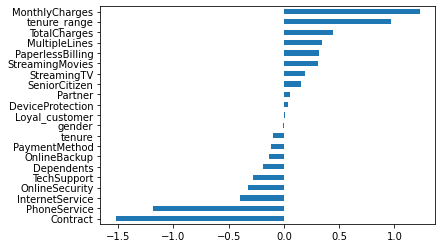

In [31]:
# To get the weights of all the variables
weights_logreg = pd.Series(model_logReg.coef_[0],
                 index=X.columns.values)
weights_logreg.sort_values().plot(kind = 'barh')

## 2- SVM model

In [41]:
model_svm = SVC(kernel='linear',C=10)
model_svm.fit(X_train, y_train)

SVC(C=10, kernel='linear')

**Testing the model**

In [42]:
y_train_pred = model_svm.predict(X_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = model_svm.predict(X_val)
print("Test Accuracy: ", metrics.accuracy_score(y_val, y_test_pred))

Train Accuracy:  0.7983670571529996
Test Accuracy:  0.8204400283889283


<AxesSubplot:>

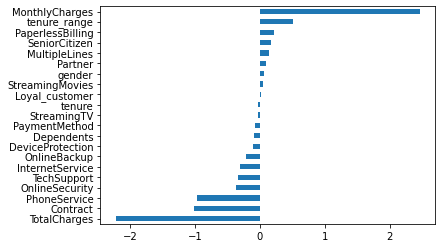

In [34]:
# To get the weights of all the variables
weights_svm = pd.Series(model_svm.coef_[0],
                 index=X.columns.values)
weights_svm.sort_values().plot(kind = 'barh')

## 3- Random Forest model

In [35]:
model_RF = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=0)
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=0)

**Testing the model**

In [36]:
y_train_pred = model_RF.predict(X_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = model_RF.predict(X_val)
print("Test Accuracy: ", metrics.accuracy_score(y_val, y_test_pred))

Train Accuracy:  0.8359957401490948
Test Accuracy:  0.8090844570617459


<AxesSubplot:>

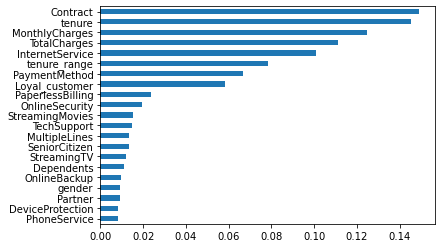

In [37]:
importances = model_RF.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values().plot(kind = 'barh')

## 4- XGBoost model

In [38]:
folds = 5

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

model_xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='binary:logistic',silent=True, nthread=1)

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 0)
random_search = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=5, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=0)

_= random_search.fit(X, y)
print(random_search.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[18:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02,

**Testing the model**

In [39]:
y_train_pred = random_search.predict(X_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = random_search.predict(X_val)
print("Test Accuracy: ", metrics.accuracy_score(y_val, y_test_pred))

Train Accuracy:  0.820021299254526
Test Accuracy:  0.8353442157558553


<AxesSubplot:>

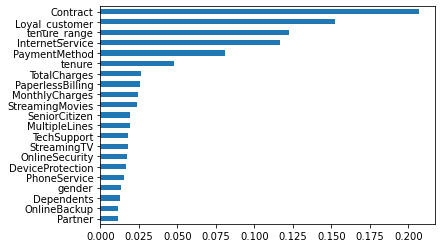

In [40]:
importances = random_search.best_estimator_.feature_importances_
weights_xgb = pd.Series(importances,
                 index=X.columns.values)
weights_xgb.sort_values().plot(kind = 'barh')